In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam

constants

In [3]:
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 1770
# Количество изображений для проверки
nb_validation_samples = 490
# Количество изображений для тестирования
nb_test_samples = 490

network

In [4]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

In [5]:
vgg16_net.trainable = False

vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0

learning

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split
from PIL import Image
train_dir = "./train/"
val_dir = "./validation/"
test_dir = "./test/"
labels = ["кошка", "собака", "человек", "дерево", "цветок"]
img_width = 150
img_height = 150
batch_size = 64
nb_train_samples = 1770
nb_validation_samples = 490
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
#data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [10]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1765 images belonging to 5 classes.
Found 485 images belonging to 5 classes.
Found 485 images belonging to 5 classes.


In [27]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    shuffle=False)

Epoch 1/100
27/27 [==============================] - 99s 4s/step - loss: 0.5757 - accuracy: 0.8119 - val_loss: 0.7020 - val_accuracy: 0.7299
Epoch 2/100
27/27 [==============================] - 97s 4s/step - loss: 0.5795 - accuracy: 0.8066 - val_loss: 0.6995 - val_accuracy: 0.7277
Epoch 3/100
27/27 [==============================] - 97s 4s/step - loss: 0.5507 - accuracy: 0.8125 - val_loss: 0.6950 - val_accuracy: 0.7277
Epoch 4/100
27/27 [==============================] - 97s 4s/step - loss: 0.5591 - accuracy: 0.8119 - val_loss: 0.6972 - val_accuracy: 0.7366
Epoch 5/100
27/27 [==============================] - 97s 4s/step - loss: 0.5495 - accuracy: 0.8242 - val_loss: 0.6908 - val_accuracy: 0.7299
Epoch 6/100
27/27 [==============================] - 97s 4s/step - loss: 0.5218 - accuracy: 0.8236 - val_loss: 0.6896 - val_accuracy: 0.7299
Epoch 7/100
27/27 [==============================] - 97s 4s/step - loss: 0.5452 - accuracy: 0.8277 - val_loss: 0.6806 - val_accuracy: 0.7344
Epoch 8/100
2

Epoch 59/100
27/27 [==============================] - 97s 4s/step - loss: 0.2767 - accuracy: 0.9253 - val_loss: 0.6289 - val_accuracy: 0.7589
Epoch 60/100
27/27 [==============================] - 97s 4s/step - loss: 0.2685 - accuracy: 0.9318 - val_loss: 0.6310 - val_accuracy: 0.7634
Epoch 61/100
27/27 [==============================] - 97s 4s/step - loss: 0.2654 - accuracy: 0.9289 - val_loss: 0.6316 - val_accuracy: 0.7634
Epoch 62/100
27/27 [==============================] - 97s 4s/step - loss: 0.2639 - accuracy: 0.9271 - val_loss: 0.6262 - val_accuracy: 0.7634
Epoch 63/100
27/27 [==============================] - 97s 4s/step - loss: 0.2706 - accuracy: 0.9242 - val_loss: 0.6269 - val_accuracy: 0.7634
Epoch 64/100
27/27 [==============================] - 97s 4s/step - loss: 0.2573 - accuracy: 0.9300 - val_loss: 0.6184 - val_accuracy: 0.7612
Epoch 65/100
27/27 [==============================] - 97s 4s/step - loss: 0.2638 - accuracy: 0.9324 - val_loss: 0.6255 - val_accuracy: 0.7634
Epoch 

In [103]:
model.fit_generator?

In [28]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))


Аккуратность на тестовых данных: 79.46%


In [137]:
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
im = image.load_img("./цветок.jpg", target_size=(150, 150))
x = image.img_to_array(im)


In [138]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


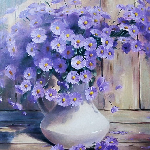

In [139]:
im

In [91]:
def decode_preds(preds):
    preds = [abs(1-el) for el in preds]
    preds.sort()
    return preds
decode_preds([1, 4, 3, 2])


[0, 1, 2, 3]

In [140]:
 preds = model.predict(x)
print(decode_preds(preds))
test_generator.class_indices

[array([1., 1., 1., 0., 1.], dtype=float32)]


{'дерево': 0, 'кошка': 1, 'собака': 2, 'цветок': 3, 'человек': 4}

In [41]:
print('Results: ', decode_predictions(preds, top=3)[0])

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 5)

In [141]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [147]:
Y_pred = model.predict_generator(val_generator, nb_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix(val_generator.classes, y_pred)

array([[ 9, 18,  4, 23,  7],
       [ 9, 31,  3, 39, 25],
       [12, 21,  4, 22,  9],
       [18, 49,  5, 52, 24],
       [12, 31,  7, 36, 15]])

In [148]:
confusion_matrix(val_generator.classes, y_pred)/100

array([[0.09, 0.18, 0.04, 0.23, 0.07],
       [0.09, 0.31, 0.03, 0.39, 0.25],
       [0.12, 0.21, 0.04, 0.22, 0.09],
       [0.18, 0.49, 0.05, 0.52, 0.24],
       [0.12, 0.31, 0.07, 0.36, 0.15]])

In [149]:
from matplotlib import pyplot as plt
%matplotlib inline

In [166]:
quality = np.array([0.2164,
                    0.3169,
                    0.3498,
                    0.3956,
                    0.4303,
                    0.5179,
                    0.5426,
                    0.5820,
                    0.6285,
                    0.6696])
epoches = range(1, 11)

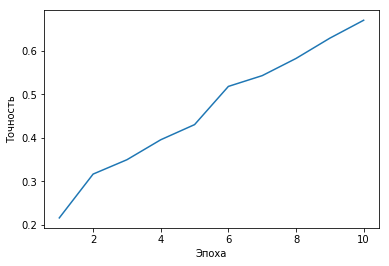

In [172]:
from matplotlib.pyplot import subplots, show
fig, ax = subplots()
ax.plot(epoches, quality)
ax.set_xlabel("Эпоха")
ax.set_ylabel("Точность")
show()

In [173]:
quality = np.array([0.2303, 
                    0.3028,
                    0.3610,
                    0.4139,
                    0.4421,
                    0.5026,
                    0.5414,
                    0.5626,
                    0.5979,
                    0.6373,
                    0.6443,
                    0.6573,
                    0.6784,
                    0.7137,
                    0.6872,
                    0.7025,
                    0.7449,
                    0.7225,
                    0.7443,
                    0.7449,
                    0.7496,
                    0.7584,
                    0.7707,
                    0.7801,
                    0.7825,
                    0.7884,
                    0.7954,
                    0.7907,
                    0.7934,
                    0.8095])
epoches = range(1, 31)

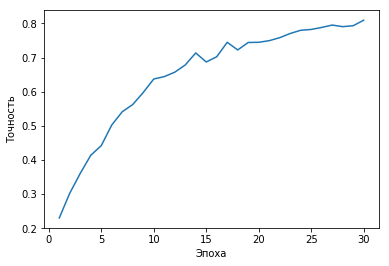

In [174]:
from matplotlib.pyplot import subplots, show
fig, ax = subplots()
ax.plot(epoches, quality)
ax.set_xlabel("Эпоха")
ax.set_ylabel("Точность")
show()

In [182]:
import os
lst = os.listdir("./Imagenet/")

In [189]:
print(test_generator.class_indices)
for i in lst:
    try:
        im = image.load_img("./Imagenet/{}".format(i), target_size=(150, 150))
        x = image.img_to_array(im)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        print(i)
        print(decode_preds(preds))
    except:
        continue



{'дерево': 0, 'кошка': 1, 'собака': 2, 'цветок': 3, 'человек': 4}
du4.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
tr3.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
vinc5.jpg
[array([1.        , 1.        , 0.23963815, 1.        , 0.        ],
      dtype=float32)]
se4.jpg
[array([1.       , 1.       , 0.9952925, 1.       , 1.       ],
      dtype=float32)]
du1.jpg
[array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       2.3841858e-07], dtype=float32)]
pi5.jpg
[array([1.       , 1.       , 0.9999999, 1.       , 1.       ],
      dtype=float32)]
se5.jpg
[array([1., 1., 1., 1., 1.], dtype=float32)]
du2.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
bo2.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
vinc4.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
vinc1.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
raf4.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
tic1.jpg
[array([1., 1., 1., 1., 0.], dtype=float32)]
du5.JPG
[array([1., 1., 1., 1., 0.], dtype=floa

In [195]:
lst = os.listdir("./Cats")
print(len(lst))
print(test_generator.class_indices)
for i in lst:
    try:
        im = image.load_img("./Cats/{}".format(i), target_size=(150, 150))
        x = image.img_to_array(im)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        print(i)
        print(decode_preds(preds))
        print('Predicted:', decode_predictions(preds, top=3)[0])
    except:
        continue


12
{'дерево': 0, 'кошка': 1, 'собака': 2, 'цветок': 3, 'человек': 4}
4fe6518cf3.jpg
[array([1.       , 0.9429571, 1.       , 1.       , 1.       ],
      dtype=float32)]
491491b192922d19a9653f99ce09742b.png
[array([1., 0., 1., 1., 1.], dtype=float32)]
5317bf0f03e6981dddff04f7496a9246--le-chat-furry-art.jpg
[array([1.        , 0.00154293, 1.        , 1.        , 1.        ],
      dtype=float32)]
x_2fa22804.jpg
[array([1., 0., 1., 1., 1.], dtype=float32)]
10324476_KotVeynObschaya6.jpg
[array([1.       , 0.9999811, 0.       , 1.       , 1.       ],
      dtype=float32)]
34272-preview.jpg
[array([1., 0., 1., 1., 1.], dtype=float32)]
267b2a9a2e75.jpg
[array([1., 0., 1., 1., 1.], dtype=float32)]
1378064451_1297005603.jpg
[array([0.99999994, 0.77399474, 1.        , 1.        , 1.        ],
      dtype=float32)]
thumb_1455.jpg
[array([1.       , 0.4015305, 1.       , 1.       , 1.       ],
      dtype=float32)]
7-1.jpg
[array([1., 0., 1., 1., 1.], dtype=float32)]
09da472c-5201-4410-a592-0e074

In [194]:
model.save_weights("./Weights_dir/", overwrite=False)

W0605 09:52:35.077987 139948431079232 network.py:1410] This model was compiled with a Keras optimizer (<tensorflow.python.keras.optimizers.Adam object at 0x7f4804507278>) but is being saved in TensorFlow format with `save_weights`. The model's weights will be saved, but unlike with TensorFlow optimizers in the TensorFlow format the optimizer's state will not be saved.

Consider using a TensorFlow optimizer from `tf.train`.


In [198]:
im = image.load_img("./Cats/4fe6518cf3.jpg".format(i), target_size=(150, 150))
x = image.img_to_array(im)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print(preds)
#print('Predicted:', decode_predictions(preds, top=3)[0])

[[7.8186824e-20 5.7042886e-02 3.2365769e-27 1.2563800e-35 0.0000000e+00]]
